# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part A): Object Recognition [75%]

<div align="right"><font color="blue" size="5">Your Score was 87.0 out of a total of 94.0, or 92.6%</font></div>

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part A of Assignment 3 - Part B is the Mini-Challenge. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (typically referring only to the independent variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook for Part A, *and*
 1. The Jupyter Notebook for Part B
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part B), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keeping the same structure**: retain the questions, and avoid adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers.

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (this notebook) is worth 75% of the total Mark for Assignment 3, while Part B (Mini-Challenge) is worth 25%: *keep this breakdown in mind when planning your work, especially for Part B*.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from utils import plotter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

C:\Users\User\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not a label), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). *Note that the normalisation procedure involves dividing the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image*. See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgId`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word: these are the `features` of the data. The last 19 attributes, which follow the pattern `is_[class]` are the class labels -- here 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset

<a id='question1_1'></a>
### ========== Question 1.1 --- [12 marks] ==========

We will first get a feel for the data. *IMPORTANT: Show all your code!*

&nbsp;&nbsp;**(a)** [Code] Load the training dataset `Images_A_Train.csv` into a pandas dataframe, keeping only the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;&nbsp;&nbsp;*Hint: You may wish to first have a look at the column names*<br>
&nbsp;&nbsp;**(b)** [Code] Using suitable pandas methods, summarise the key properties of the data, *and*<br>
&nbsp;&nbsp;**(c)** [Text] comment on your observations from ***(b)*** (dimensionality, data ranges, anything out of the ordinary).

<div align="right"><font color="blue" size="4">11.0/12.0</font></div>

In [2]:
# (a) # Your Code goes here:
a_train_loc = os.path.join(os.getcwd(), 'datasets', 'Images_A_Train.csv')
img_a_train=pd.read_csv(a_train_loc)
label_a_train=img_a_train['is_person'] #selecting only the is_person class label from our dataset.
features_a_train=img_a_train.loc[:,'dim1':'dim500'] #selecting only the visual features from our dataset.
img_a_train=pd.concat([features_a_train,label_a_train],axis=1)#merging the visual features with the is_person class label.


<div align="right"><font color="blue" size="4">3.0</font></div>

In [3]:
# (b) # Your Code goes here:
#summary statistics, to see range of data.
display(img_a_train.describe())
#basic information, to see dimensionality and other info.
display(img_a_train.info())
#inspect why there are 5 columns other than is_person which have integer data type.
ints=img_a_train.loc[:,img_a_train.dtypes=='int64'].head(3)
display(ints)
display(ints.columns) #to extract the column names
#observed that these columns have integer values 0, test if there is any value other than 0 for one of those columns.
display(img_a_train.loc[img_a_train['dim374']>0])

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,...,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,0.001751,0.000756,0.004317,0.001853,0.002272,0.002220,0.001019,0.002446,0.002088,0.002746,...,0.000563,0.004586,0.001541,0.003642,0.002200,0.002928,0.002173,0.002485,0.002978,0.449116
std,0.001193,0.001406,0.003693,0.001340,0.001598,0.001741,0.000873,0.002910,0.001971,0.002328,...,0.001203,0.005825,0.001192,0.002657,0.001664,0.003254,0.001418,0.001997,0.002765,0.497523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000833,0.000000,0.001359,0.000756,0.001116,0.001019,0.000340,0.000625,0.000744,0.001116,...,0.000000,0.000679,0.000679,0.001698,0.001019,0.000744,0.001116,0.001019,0.001019,0.000000
50%,0.001563,0.000340,0.003397,0.001698,0.002038,0.001860,0.000744,0.001563,0.001698,0.002056,...,0.000000,0.002717,0.001359,0.003057,0.001860,0.001953,0.002038,0.002038,0.002232,0.000000
75%,0.002378,0.000893,0.006324,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003736,...,0.000679,0.006454,0.002232,0.004808,0.003057,0.003780,0.002976,0.003397,0.004076,1.000000
max,0.009851,0.016644,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.021739,0.053329,0.010234,0.024457,0.011719,0.028125,0.008492,0.014509,0.028533,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Columns: 501 entries, dim1 to is_person
dtypes: float64(495), int64(6)
memory usage: 8.0 MB


None

,dim72,dim91,dim140,dim293,dim374,is_person
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0


Index(['dim72', 'dim91', 'dim140', 'dim293', 'dim374', 'is_person'], dtype='object')

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person


<div align="right"><font color="blue" size="4">4.0</font></div>

(c) ***Your answer goes here:***
There are 2093 images (rows) in this dataset, with 500 visual features (dim1 to dim500) and 1 true class label (is_person, shows whether each picture contains a person (1) or not (0) ) for each, which gives us 501 columns. Almost half (~44.9% as seen from the mean of is_person) of our images are classified as containing a person. All *visual words* (feature columns) have **minimum** count values=0(they do not occur in some images/data points)  and their maximum values vary.
However, 5 of the visual features ([dim72, dim91, dim140, dim293 and dim374]), which are of integer data type, do **not have non-zero counts for any image//all zeros**, which means that these particular *visual words* are not useful for determining the class of **any** image in this dataset(or even **harmful** in cases(i.e.*regression* classifiers) where they *can't be ignored* and behave as ***outliers in that dimension***). 

<div align="right"><font color="blue" size="4">4.0</font></div>

### ========== Question 1.2 --- [8 marks] ==========

Now we will prepare the testing set in a similar manner.

&nbsp;&nbsp;**(a)** [Code] Load the testing dataset `Images_A_Test.csv` into a pandas dataframe: again extract the Visual Features and the `is_person` column. <br>
&nbsp;&nbsp;**(b)** [Code] Using similar methods to [Q1.1](#question1_1) verify that the testing set is similar to the training set.<br>
&nbsp;&nbsp;**(c)** [Text] Indicate the dimensionality, and comment on any discrepancies if any (if they are similar, just say so).

<div align="right"><font color="blue" size="4">7.0/8.0</font></div>

In [4]:
# (a) # Your Code goes here:
a_test_loc = os.path.join(os.getcwd(), 'datasets', 'Images_A_Test.csv')
img_a_test=pd.read_csv(a_test_loc)
label_a_test=img_a_test['is_person'] #selecting only the is_person class label from our dataset.
features_a_test=img_a_test.loc[:,'dim1':'dim500'] #selecting only the visual features from our dataset.
img_a_test=pd.concat([features_a_test,label_a_test],axis=1)#merging the visual features with the is_person class label.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [5]:
# (b) # Your Code goes here:
#summary statistics, to see range of data.
display(img_a_test.describe())
#basic information, to see dimensionality and other info.
display(img_a_test.info())
#inspect why there are 5 columns other than is_person which have integer data type.
ints=img_a_test.loc[:,img_a_test.dtypes=='int64'].head(3)
display(ints)
display(ints.columns) #to extract the column names
#observed that these columns have integer values 0, test if there is any value other than 0 for one of those columns.
display(img_a_test.loc[img_a_test['dim63']>0])

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,...,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000
mean,0.001744,0.000702,0.004720,0.001978,0.002321,0.002110,0.001037,0.002529,0.002006,0.002641,...,0.000598,0.004817,0.001585,0.003611,0.002196,0.002772,0.002239,0.002407,0.003097,0.473495
std,0.001209,0.001364,0.003876,0.001417,0.001558,0.001559,0.000885,0.002736,0.001919,0.002293,...,0.001241,0.005831,0.001243,0.002471,0.001575,0.003182,0.001346,0.001868,0.002590,0.499521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000744,0.000000,0.001698,0.001019,0.001172,0.001019,0.000340,0.000679,0.000781,0.001019,...,0.000000,0.000679,0.000679,0.001860,0.001019,0.000679,0.001250,0.001019,0.001359,0.000000
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001803,0.000781,0.001698,0.001563,0.002038,...,0.000000,0.002734,0.001359,0.003125,0.001860,0.001838,0.002038,0.002038,0.002604,0.000000
75%,0.002378,0.000758,0.007102,0.002734,0.003057,0.002976,0.001488,0.003397,0.002717,0.003397,...,0.000679,0.006793,0.002232,0.004836,0.003057,0.003736,0.003057,0.003348,0.004092,1.000000
max,0.007133,0.022135,0.023438,0.008929,0.010417,0.010789,0.005757,0.022396,0.025000,0.013927,...,0.012747,0.042026,0.009821,0.015625,0.013346,0.029225,0.007068,0.011889,0.026786,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Columns: 501 entries, dim1 to is_person
dtypes: float64(494), int64(7)
memory usage: 4.3 MB


None

,dim63,dim72,dim91,dim140,dim293,dim374,is_person
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1


Index(['dim63', 'dim72', 'dim91', 'dim140', 'dim293', 'dim374', 'is_person'], dtype='object')

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person


<div align="right"><font color="blue" size="4">2.0</font></div>

(c) ***Your answer goes here:***
The test dataset contains less (1113) images, but (of course) the same number of visual features (dims) and the 1 label (is_person).
We notice that there is a slightly larger proportion (~47.3%, mean of is_person) of test images classified as containing a person.
We also notice that there is **one extra non-useful visual word feature, namely dim63**, apart from the aforementioned 5 visual words which are similarly non-useful in determining *any class* for *any data point(image)* in the test dataset as in the training dataset.

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 1.3 --- [5 marks] ==========

We will now prepare the data for training.

&nbsp;&nbsp;**(a)** [Code] Split both the training and testing sets into a matrix of features (independent) variables [X_tr/X_tst] and a vector of prediction (dependent) variables [y_tr/y_tst]. ***[Optional]*** *As a sanity check, you may wish to verify the dimensionality of the X/y variables*.<br>
&nbsp;&nbsp;**(b)** [Code] Using seaborn's [countplot](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) function, visualise the distribution of the person-class (True/False) in the training and testing sets (use two figures or sub-plots). Annotate your figures.<br>
&nbsp;&nbsp;**(c)** [Text] Do you envision any problems with the distribution under both sets? Would classification accuracy be a good metric for evaluating the performance of the classifiers? Why or why not?

<div align="right"><font color="blue" size="4">5.0/5.0</font></div>

In [6]:
# (a) # Your Code goes here:
X_tr=features_a_train
X_tst=features_a_test
y_tr=label_a_train
y_tst=label_a_test
print('X_tr ', X_tr.shape)
print('X_tst ',X_tst.shape)
print('y_tr ',y_tr.shape)
print('y_tst ',y_tst.shape)

X_tr  (2093, 500)
X_tst  (1113, 500)
y_tr  (2093,)
y_tst  (1113,)


<div align="right"><font color="blue" size="4">1.0</font></div>

[[Text(0,0,'Not a Person'), Text(0,0,'Person')]]

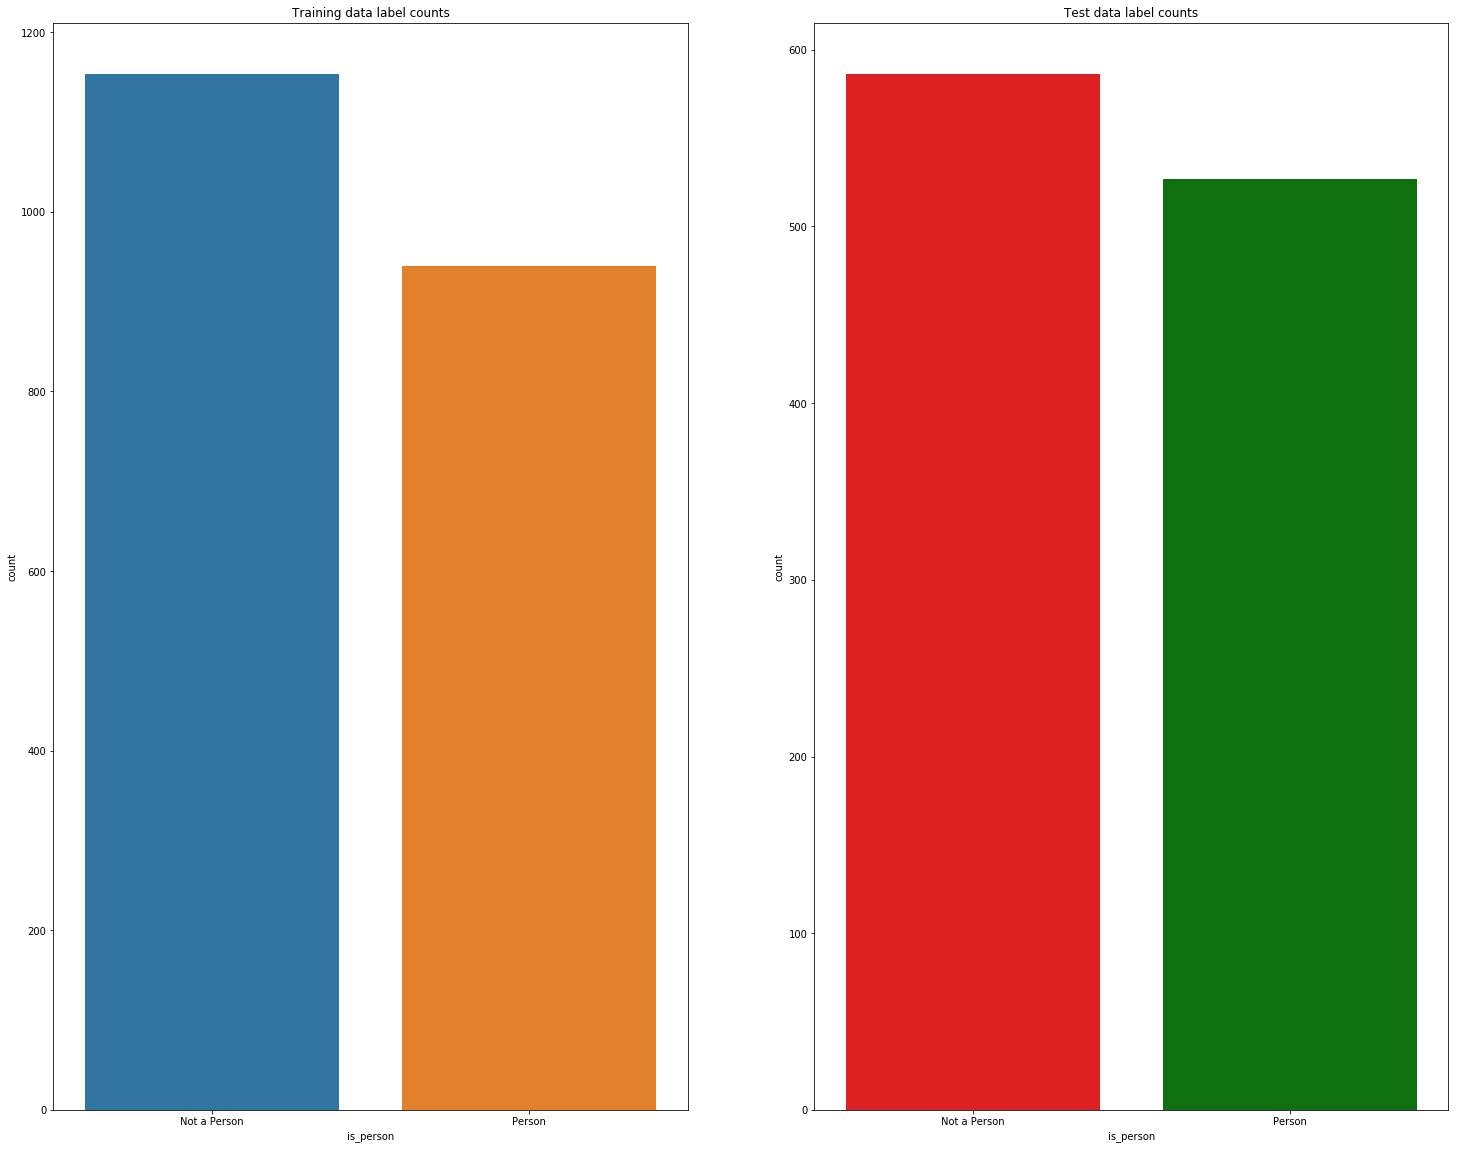

In [7]:
# (b) # Your Code goes here:
fig,axes=plt.subplots(1,2, figsize=(25,20))
axes[0].set_title('Training data label counts')
axes[1].set_title('Test data label counts')
train_count=sns.countplot(y_tr,ax=axes[0])
train_count.set(xticklabels=['Not a Person','Person'])
test_count=sns.countplot(y_tst,ax=axes[1],palette=['r','g'])
test_count.set(xticklabels=['Not a Person','Person'])

<div align="right"><font color="blue" size="4">2.0</font></div>

(c) ***Your answer goes here:***
The data is **unbalanced** in both *train* and *test* sets towards the zero value, giving the "majority" class to an image **not** being a person. 
This can affect many classifiers which give more weight to the majority class as a better prediction (e.g. Naive Bayes, Decision Trees), producing a **lower** *classification accuracy*. 
However, the class is **not heavily unbalanced**, so we could argue that if we used another metric rather than *accuracy* (e.g. confusion matrix, precision , recall, miss rate etc.) we could have a better indication of our classifiers' performances. 

N.B. This answer refers to the specific task of binary classification for the **single class is_person** problem. Dealing with the ***multiple class problem*** would yield a very different answer for this distribution of data.

<div align="right"><font color="blue" size="4">2.0</font></div>

## 2. Exploring Different Models for Classification

### ========== Question 2.1 --- [3 marks] ==========

As always, we wish to start with a very simple baseline classifier, which will provide a sanity check when training more advanced models.

&nbsp;&nbsp;**(a)** [Text] Define a baseline classifier (indicate why you chose it/why it is relevant).<br>
&nbsp;&nbsp;**(b)** [Code] Report the accuracy such a classifier would achieve on the testing set.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

(a) ***Your answer goes here:***
A relevant baseline to choose is to only consider the majority class value from our training (coincidently also test) data, for the reason of explotining the imbalance between the two values as explained in 1.3. This baseline will not produce a great accuracy score, but will be a good base performance comparison for our subsequent classifiers.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [8]:
# (b) # Your Code goes here:
y_base=np.zeros(y_tst.size) #choosing the majority value (zeros) with the size of the testing set target
print('baseline accuracy on test data = ',round(accuracy_score(y_true=y_tst,y_pred=y_base),4))

baseline accuracy on test data =  0.5265


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.2 --- [9 marks] ==========
<a id='question2_2'></a>
Let us now train a more advanced Model.

&nbsp;&nbsp;**(a)** [Code] Train a [`LogisticRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the testing set.<br>
&nbsp;&nbsp;**(b)** [Text] Comment on the performance of the Logistic Regressor in comparison with the baseline model.<br>
&nbsp;&nbsp;**(c)** [Code] Visualise the errors using an appropriate method to justify your answer to (b).<br>
&nbsp;&nbsp;**(d)** [Text] Referring back to the observations in [Q1.1](#question1_1), and assuming that we know that the features should be informative, why do you think this may be happening?<br>

<div align="right"><font color="blue" size="4">7.0/9.0</font></div>

In [9]:
# (a) # Your Code goes here:
logistic=LogisticRegression(solver='lbfgs')
logistic.fit(X_tr,y_tr)
print('logistic regressor accuracy on test data = ',round(logistic.score(X=X_tst,y=y_tst),4))

logistic regressor accuracy on test data =  0.5265


<div align="right"><font color="blue" size="4">2.0</font></div>

(b) ***Your answer goes here:***
The logistic regressor gets the same classification accuracy(1-error) as the baseline (majority/mode class) classifier.

<div align="right"><font color="blue" size="4">1.0</font></div>

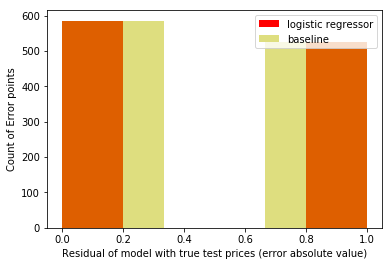

In [10]:
# (c) # Your Code goes here:
plt.hist(np.abs(logistic.predict(X_tst)-y_tst),bins=5,color='r')
plt.hist(np.abs(y_base-y_tst),bins=3,color='y',alpha=0.5)
plt.xlabel('Residual of model with true test prices (error absolute value)')
plt.ylabel('Count of Error points')
plt.legend(['logistic regressor','baseline'])

<div align="right"><font color="blue" size="4">3.0</font></div>

(d) ***Your answer goes here:***
The "dim" features that were observed in Q1.1.c act harmfully as **outliers** in the logistic regressor, causing the whole model to change at a significant level because of them and failing to capture the correct pattern of the features in the training set. These features [dim72, dim91, dim140, dim293 and dim374] in the training set and the *same features + **dim63*** in the testing set cause the mean to be biased and hence the whole model is erroneous as logistic regression is one of the models which is affected by outliers (which alter mean and scale).

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.3 --- [13 marks] ==========

You should have noticed that the performance of the above logistic regressor is less than satisfactory. Let us attempt to fix this by preprocessing the inputs `X`.

&nbsp;&nbsp;**(a)** [Text] Before applying the processing, comment on whether you should base any parameters of the preprocessing on the training or testing set or both and what repurcussions this may have.<br>
&nbsp;&nbsp;**(b)** [Code] Following from your observations in [Q2.2.(d)](#question2_2), process the features in both the **training** as well as the **testing** sets accordingly. *Hint: There is an sklearn [package](http://scikit-learn.org/0.19/modules/preprocessing.html) which may be very useful.* <br>
&nbsp;&nbsp;**(c)** [Code] Now Train a Logistic Regressor on the transformed training set, keeping the same settings as in the previous question. Report the classification accuracy on the testing set and visualise the errors in a similar way to [Q2.2(c)](#question2_2). <br>
&nbsp;&nbsp;**(d)** [Text] Finally comment on the comparative performance with [Q2.2](#question2_2).

<div align="right"><font color="blue" size="4">12.0/13.0</font></div>

(a) ***Your answer goes here:***
The best solution would be to base/fit the parameters *solely to the training set*. The following text describes the reasons behind my answer.

If we base the parameters of preprocessing *solely* on the training data, this means that we will train the regressor(or any other desired classifier/regressor) on correctly distributed data. We know by observation that the testing data is distributed similarly (with the exception of `dim63`) to the training set.

If we base the parameters of preprocessing on the testing set *solely* instead, then we will have a well-formulated testing set, but we will have **wrongly trained/learned** our regressor on *erroneous training* data, even if we rescale it.

If we  base the parameters of preprocessing to *both* sets, this is also not a great solution, as it will use testing data as if we knew that we would face such a distribution, which defeats the purpose of having **unknown** test data to test the *performance* of the regressor/any model. 

This reminds of a more generalized common problem in ML, which is that we adjust our learning and predicting of the regressor to current/present data, whereas we cannot **face future data which might alter the distribution by accident or by choice** (this is a common problem as we do not know the p(y|x_new) and hence can only provide an *estimate* of the ***true future error rate***

<div align="right"><font color="blue" size="4">2.0</font></div>

In [11]:
# (b) # Your Code goes here:
scaler=RobustScaler().fit(X_tr) #Used RobustScaler to not be affected by outliers (uses median & IQR instead of mean & s.d.)
X_tr_scaled=scaler.transform(X_tr)
X_tst_scaled=scaler.transform(X_tst)

<div align="right"><font color="blue" size="4">5.0</font></div>

logistic regressor accuracy on TRANSFORMED test data =  0.6496


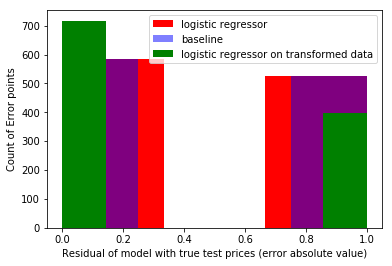

In [12]:
# (c) # Your Code goes here:
logistic_scaled=LogisticRegression(solver='lbfgs')
logistic_scaled.fit(X_tr_scaled,y=y_tr)
print('logistic regressor accuracy on TRANSFORMED test data = ',
      round(logistic.score(X=X_tst_scaled,y=y_tst),4))
plt.hist(np.abs(logistic.predict(X_tst)-y_tst),bins=3,color='r')
plt.hist(np.abs(y_base-y_tst),bins=4,color='b',alpha=0.5)
plt.hist(np.abs(logistic_scaled.predict(X_tst_scaled)-y_tst),bins=7,color='g')
plt.xlabel('Residual of model with true test prices (error absolute value)')
plt.ylabel('Count of Error points')
plt.legend(['logistic regressor','baseline','logistic regressor on transformed data'])

<div align="right"><font color="blue" size="4">4.0</font></div>

(d) ***Your answer goes here:***
The performance of the new logistic regressor trained on the transformed data and predicting on the transformed testing data has **~12.3%** higher performance(accuracy, less error) than the baseline and previous logistic regressor(not transformed data). This is a good increase but still not as satisfactory and significant as expected.

<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.4 --- [18 marks] ==========
<a id='question2_4'></a>
So far we have used default settings for training the logistic regression classifier. Now we want to optimise the hyperparameters of the classifier, namely the regularisation parameter `C`. We will do this through [K-fold cross-validation](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html). You should familiarise yourself with the interpretation of the `C` parameter.

&nbsp;&nbsp;**(a)** [Text] Why do we use cross-validation to optimise the hyper-parameters, rather than using the test-set?<br>
&nbsp;&nbsp;**(b)** [Code] Load the datasets `Images_B_Train.csv` and `Images_B_Test.csv` (this ensures everyone is using the same pre-processed data). Again, extract the relevant columns (`dim1` through `dim500` and the `is_person` class) from each dataset, and store into `X_train`/`X_test` and `y_train`/`y_test` variables.<br>
&nbsp;&nbsp;**(c)** [Code] Using Cross-Validation on the **Training** set (a 5-fold split should be sufficient: set `shuffle=True` and `random_state=0`), perform a search for the best value of `C` in the range `1e-5` to `1e5` (*Hint: the KFold [split](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold.split) method will come in handy*). Keep track of the validation-set accuracy per-fold for each value of `C` in an array. Think carefully about the best way to cover the search space: i.e. the step-lengths and number of steps.<br>
&nbsp;&nbsp;**(d)** [Code] Plot the mean and standard-deviation (across folds) of the accuracy as a function of `C`. *Hint: you may find the matplotlib's [errorbar](https://matplotlib.org/2.2.3/api/_as_gen/matplotlib.pyplot.errorbar.html) function useful. Be careful to use the correct scale on the x-axis.* Using the mean values, report the regularisation parameter with the best accuracy (alongside its accuracy): *N.B. Do not pick the optimal value "by hand", instead use an appropriate numpy function*.<br>
&nbsp;&nbsp;**(e)** [Text] Comment on the output, especially as regards the effect of the regularisation parameter (you should write between 3 and 4 sentences).<br>
&nbsp;&nbsp;**(f)** [Code] By using the optimal value (i.e. the one that yields the highest average K-Fold classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set.

**N.B.: Keep track of the KFold object you created as we will keep using it**

<div align="right"><font color="blue" size="4">17.0/18.0</font></div>

(a) ***Your answer goes here:***
If we use the testing set to optimize the hyper-parameters, we will not have any **real testing** data to test our optimized regressor. We use cross-validation to capture the best instance trends and optimize our hyper-parameters (in this case `C`) and then *test* the performance on the *test-set*.
Most importantly, we need to use cross-validation to have more and different splittings of the data in order to confirm the reliability of the model in different distributions of the data.

<div align="right"><font color="blue" size="4">1.0</font></div>

In [13]:
# (b) # Your Code goes here:
b_train_loc = os.path.join(os.getcwd(), 'datasets', 'Images_B_Train.csv')
img_b_train=pd.read_csv(b_train_loc)
label_b_train=img_b_train['is_person'] #selecting only the is_person class label from our dataset.
features_b_train=img_b_train.loc[:,'dim1':'dim500'] #selecting only the visual features from our dataset.
img_b_train=pd.concat([features_b_train,label_b_train],axis=1)#merging the visual features with the is_person class label.

#Similarly for the testing set
b_test_loc = os.path.join(os.getcwd(), 'datasets', 'Images_B_Test.csv')
img_b_test=pd.read_csv(b_test_loc)
label_b_test=img_b_test['is_person'] 
features_b_test=img_b_test.loc[:,'dim1':'dim500'] 
img_b_test=pd.concat([features_b_test,label_b_test],axis=1)

#Load sets into specified variables
X_train=features_b_train
X_test=features_b_test
y_train=label_b_train
y_test=label_b_test

<div align="right"><font color="blue" size="4">2.0</font></div>

In [14]:
# (c) # Your Code goes here:
kfold=sklearn.model_selection.KFold(n_splits=5,shuffle=True,random_state=0)

accuracies = np.ndarray((5,11))     #I use a 2d_array to store the accuracies for each kfold-C value pair
fold_i = 0 #this will be the first dimension for the accuracies array, indicating which fold we're in.
for train_indices, test_indices in kfold.split(X_train): #iterate on all pairs of train-test sets/splits of X_train
    
    C_i= 0 #this will be the second dimension of the accuracies array, indicating which C-value we're testing.
    
    #used logspace with base 10 to cover the range (1E-5 to 1E5) with 11 samples/steps which is suitable to have a
    # geometric split (log-range(=11, -5 to 5).
    for Ctemp in np.logspace(start=-5, stop=5, num=11):
        
        #use the current value of C as a setting for a temporary logistic regressor
        logistic_temp = LogisticRegression(solver="lbfgs", C=Ctemp)
        #use the train indices from kfold.split to train the temp logistic regressor on the "training set"
        logistic_temp.fit(X=X_train.iloc[train_indices], y=y_train.iloc[train_indices]) 
        
        #use the test indices from kfold.split to test the temp logistic regressor on the "testing set"
        #and populate the accuracies array with the accuracy score for that specific fold-Cvalue entry
        accuracies[fold_i, C_i] = logistic_temp.score(X=X_train.iloc[test_indices], y=y_train.iloc[test_indices])

        C_i=C_i+1 # move to the next C-value position (inner dimension in the accuracies array).
    print("Accuracies for fold ",fold_i+1, " for the 11 values of C in the range 1E-5 to 1E5:  ")
    print(accuracies[fold_i])
    print()
    fold_i=fold_i+1#when all C-values are done for one dimension, move to the next fold position in the array(outer dimension)
print("The whole array of accuracies:")
print(accuracies) 

Accuracies for fold  1  for the 11 values of C in the range 1E-5 to 1E5:  
[0.56563246 0.66825776 0.67303103 0.66825776 0.65871122 0.64200477
 0.64439141 0.64439141 0.64439141 0.64439141 0.64439141]

Accuracies for fold  2  for the 11 values of C in the range 1E-5 to 1E5:  
[0.61336516 0.6849642  0.74224344 0.71360382 0.65871122 0.64200477
 0.6372315  0.63484487 0.6372315  0.6372315  0.6372315 ]

Accuracies for fold  3  for the 11 values of C in the range 1E-5 to 1E5:  
[0.54653938 0.70405728 0.73031026 0.69451074 0.65155131 0.6300716
 0.62052506 0.61813842 0.62052506 0.62052506 0.61813842]

Accuracies for fold  4  for the 11 values of C in the range 1E-5 to 1E5:  
[0.52870813 0.6507177  0.6937799  0.69617225 0.68181818 0.6722488
 0.66267943 0.66267943 0.66267943 0.66267943 0.66267943]

Accuracies for fold  5  for the 11 values of C in the range 1E-5 to 1E5:  
[0.55980861 0.63636364 0.65789474 0.66985646 0.65550239 0.64832536
 0.6507177  0.64593301 0.64832536 0.64832536 0.6507177 ]

Th

<div align="right"><font color="blue" size="4">6.0</font></div>

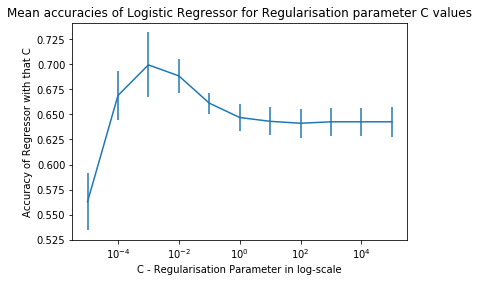

Optimal C value:  0.0010000
Optimal C value corresponding average k-fold classification accuracy:   0.699


In [16]:
# (d) # Your Code goes here:
means = np.mean(accuracies, axis=0) #calculate the means of each C VALUE (hence use axis=0), 
#since we want the plot as a function of C (accross folds)
stds=np.std(accuracies,axis=0)
Crange = np.logspace(start=-5, stop=5, num=11) #use the range of the C values as the x-axis
plt.errorbar(x=Crange, y=means,yerr=stds) #use mean accuracies per fold as y axis and standard deviations as errors in errorbar.
plt.semilogx() #setting the correct scale to the x-axis to match the range (logspace)
plt.xlabel("C - Regularisation Parameter in log-scale")
plt.ylabel("Accuracy of Regressor with that C")
plt.title("Mean accuracies of Logistic Regressor for Regularisation parameter C values")
plt.show()


#used np function where (as asked for a suitable np function)
#to find the position of the max mean accuracy and use it to extract the C value from the range of C values using the index.
C_optimal = Crange[np.where(means==means.max())[0][0]] #note we use [0][0] to deal with the 2d output format of where.


print ("Optimal C value: ", "%0.7f" %C_optimal) #print formatted to 7 d.p. the optimal C parameter
print ("Optimal C value corresponding average k-fold classification accuracy:  ", round(means.max(),3))


<div align="right"><font color="blue" size="4">5.0</font></div>

(e) ***Your answer goes here:***
We can see that the regularization parameter plays a huge role on the classification accuracy of the cross validation (and not only).
We see that depending on the value varying for the C-parameter(along with different folds), we had result accuracies ranging **from ~53% up to ~75%**. This indicates that it is very important to adjust the regularization parameter in order to increase our model's accuracy on our data.
We can also observe from the errorbar plot that the regularization parameter does not follow a symmetric or any predictable distribution, but its *means **and** errors(stds)* vary in different values along the range (logspace) that we specified.  

<div align="right"><font color="blue" size="4">2.0</font></div>

In [19]:
# (f) # Your Code goes here:
#train a final optimal logistic regressor using the previous settings but with C_optimal as the parameter.
logistic_optimal = LogisticRegression(solver="lbfgs", C=C_optimal).fit(X=X_train, y=y_train)
print ("Optimal logistic regressor accuracy on test data = ", round(logistic_optimal.score(X=X_test, y=y_test),3))

Optimal logistic regressor accuracy on test data =  0.699


<div align="right"><font color="blue" size="4">1.0</font></div>

### ========== Question 2.5 --- (LEVEL 11) --- [12 marks] ==========

Let us attempt to validate the importance of the various features for classification. We could do this like we did for linear regression by looking at the magnitude of the weights. However, in this case, we will use the [`RandomForestClassifier`](http://scikit-learn.org/0.19/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to give us a ranking over features.

&nbsp;&nbsp;**(a)** [Text] How can we use the Random-Forest to get this kind of analysis? *Hint: look at the `feature_importances` property in the SKLearn implementation.*<br>
&nbsp;&nbsp;**(b)** [Code] Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators=500`). Set `random_state=42` to ensure reproducible results and `criterion=entropy` but leave all other parameters at their default value. Report the accuracy score on both the training and testing sets.<br>
&nbsp;&nbsp;**(c)** [Text] Comment on the discrepancy between training and testing accuracies.<br>
&nbsp;&nbsp;**(d)** [Code] By using the random forest model display the names of the 10 most important features (in descending order of importance).<br>


(a) ***Your answer goes here:***

In [18]:
# (b) # Your Code goes here:

(c) ***Your answer goes here:***

In [19]:
# (d) # Your Code goes here:

### ========== Question 2.6 --- [12 marks] ==========

We would like now to explore another form of classifier: the Support Vector Machine. A key decision in training SVM's is what kind of kernel to use. We will explore with three kernel types: linear, radial-basis-functions and polynomials. To get a feel for each we will first visualise typical decision boundaries for each of these variants. To do so, we have to simplify our problem to two-dimensional input (to allow us to visualise it).

&nbsp;&nbsp;**(a)** [Code] Using the training set only, create a training `X` matrix with only the `dim21` and `dim51` columns. ***N.B.*** *Python (and numpy) use zero-based indexing*. Then train three distinct classifiers on this 2D data. Use a `linear` kernel for one, an `rbf` kernel for another (set `gamma='auto'`) and a second order (`degree`) polynomial kernel for the other. Set `C=1` in all cases. Using the function `plot_SVM_DecisionBoundary` from our own library (it exists under the `plotters` module), plot the decision boundary for all three classifiers.<br>
&nbsp;&nbsp;**(b)** [Text] Explain (intuitively) the shape of the decision boundary for each classifier (i.e. comment on what aspect of the kernel gives rise to it). Use this to comment on how it relates to classification accuracy.

<div align="right"><font color="blue" size="4">11.0/12.0</font></div>

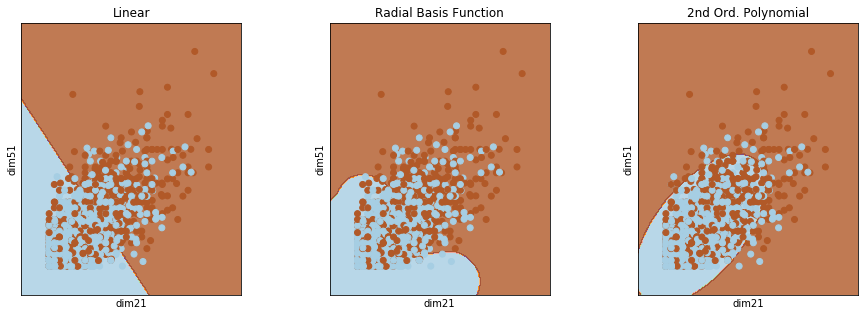

In [20]:
# (a) # Your Code goes here:
dim21=(X_train['dim21'])
dim51=(X_train['dim51'])
X=pd.concat([dim21,dim51],axis=1)
X=X.values
svc_linear = SVC(kernel="linear",C=1)
svc_linear.fit(X=X, y=y_train)
svc_rbf = SVC(kernel="rbf",gamma='auto',C=1)
svc_rbf.fit(X=X, y=y_train)
svc_polynomial = SVC(kernel="poly",degree=2,C=1)
svc_polynomial.fit(X=X, y=y_train)
clfs=[svc_linear,svc_rbf,svc_polynomial]
plotter.plot_SVM_DecisionBoundary(X=X,y=y_train,clfs=clfs,labels=['dim21','dim51'],title=['Linear','Radial Basis Function','2nd Ord. Polynomial'])

<div align="right"><font color="blue" size="4">5.0</font></div>

(b) ***Your answer goes here:***
The decision boundary for the linear-kernel (first) Support Vector Classifier is ***linear (a line)***, whereas for the Radial Basis Function (second) and 2nd order polynomial(third) SVCs, the *decision boundaries* **correspond** to the *kernel function type* (determined by **ε** in the rbf and being **2nd order/quadratic** in the poly SVC respectively).

We observe that the more flexible the decision boundary is, the better the data is classified/separated. This is due to the data not being ***linearly separable***, which will make the linear SVC(first) less accurate (lower accuracy score) than the other SVCs. 

It seems that the 2nd order polynomial doesn't capture/separate correctly the red(negative probably, is_person=0) data points *as well as* the rbf SVC. This is not definite from the visualization and should be checked with the accuracies.

<div align="right"><font color="blue" size="4">6.0</font></div>

### ========== Question 2.7 --- [14 marks] ==========
Let us now explore the polynomial SVM further. We will go back to using the **FULL** dataset (i.e. the one we loaded in [Question 2.4](#question2_4)). There are two parameters we need to tune: the order of the polynomial and the regression coefficient. We will do this by way of a grid-search over parameters. To save computational time, we will use a constrained search space:

&nbsp;&nbsp;**(a)** [Code] Define an appropriate search space for `C` in the range `1e-2` to `1e3` using 6-steps (think about the step-size), and for the `degree` in the range 1 through 5 inclusive (5 steps). Using the `K-fold` iterator from [Q2.5](#question2_4), optimise the values for `C` and the `degree` in the above specified range. Keep track of the mean cross-validation accuracy for each parameter combination.<br>
&nbsp;&nbsp;**(b)** [Code] Using a seaborn heatmap, plot the fold-averaged classification accuracy for each parameter combination (label axes appropriately). Finally also report the combination of the parameters which yielded the best accuracy.<br>
&nbsp;&nbsp;**(c)** [Code] Retrain the (polynomial-kernel) SVC using the optimal parameters found in **(b)** and report its accuracy on the **Testing** set.<br>
&nbsp;&nbsp;**(d)** [Text] Explain the results relative to the Logistic Classifier.

<div align="right"><font color="blue" size="4">14.0/14.0</font></div>

In [136]:
# (a) # Your Code goes here:

Crange_SVM=np.logspace(start=-2,stop=3,num=6) #used 6 steps as specified,the step-size is again evenly-spaced
#as chosen from the logspace function.

degrange=np.arange(1,6) #the arange with arguments (1,6) will take the range 1..5 inclusive. 

accuracies_SVM = np.ndarray((5,6,5)) #initialize a 3d array(fold iteration,C value and degree value dimensions)

fold_i=0
for train_indices, test_indices in kfold.split(X_train):
    print('Accuracies for fold ',fold_i+1,':  ')
    C_i=0
    for C_temp in Crange_SVM:
        print('Accuracies for C value= ',C_temp,' for the 5 polynomial degrees:  ')
        deg_i=0
        for deg_temp in degrange: 
            SVC_temp = SVC(kernel='poly',degree=deg_temp,C=C_temp)
            SVC_temp.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
            accuracy_score = SVC_temp.score(X_train.iloc[test_indices], y_train.iloc[test_indices])
            accuracies_SVM[fold_i, C_i,deg_i] = accuracy_score
            deg_i=deg_i+1
        print(accuracies_SVM[fold_i,C_i])
        C_i=C_i+1
    fold_i=fold_i+1
    print()          

print('Mean (accross folds) cross-validated accuracies for C-degree combinations ')
means_SVM=(np.mean(accuracies_SVM,axis=0))
C_i=0
for C_temp in Crange_SVM:
    print('Fold-averaged cross-validation accuracies for C= ',C_temp,' for each of the 5 degrees: ')
    print(means_SVM[C_i])
    C_i=C_i+1



################ ALTERNATIVE CONCISE SOLUTION USING cross_val_score with a 2d array(instead of 3d)#######################
#REASON I DON'T USE THIS SOLUTION INSTEAD IS THE INSTRUCTION/QUESTION ASKING TO USE THE PREVIOUS ITERATOR-KFOLD SPLIT####
##################TO RUN AND CHECK/MARK SELECT ALL COMMENTED CODE AND HIT "CTRL + /" ####################################
#########################################################################################################################

# Crange_SVM=np.logspace(start=-2,stop=3,num=6) #used 6 steps as specified,the step-size is again evenly-spaced
# #as chosen from the logspace function.

# degrange=np.arange(1,6) #the arange with arguments (1,6) will take the range 1..5 inclusive. 


# mean_accuracies_SVM = np.ndarray((6,5)) #initialize a 3d array(fold iteration,C value and degree value dimensions)
# C_i=0
# for C_temp in Crange_SVM:
#     deg_i=0
#     for deg_temp in degrange: 
#         SVC_temp = SVC(kernel='poly',degree=deg_temp,C=C_temp)
#   # Following line is the difference from other solution: using mean of cross_val_score and NO kfold splits outer loop
#   # This saves some computational cost because I use 2 for-loops instead of 3 and also produces progress outputs(verbose)
#         accuracy_score = np.mean(cross_val_score(X=X_train,y=y_train,cv=kfold,estimator=SVC_temp,verbose=1,n_jobs=-1))
#         mean_accuracies_SVM[C_i,deg_i] = accuracy_score
#         deg_i=deg_i+1
    
#     C_i=C_i+1
        
# print("Fold-averaged accuracies:  ")
# print(mean_accuracies_SVM)

##########################################################################################################################
# ########################################################################################################################


Accuracies for fold  1 :  
Accuracies for C value=  0.01  for the 5 polynomial degrees:  
[0.55608592 0.55131265 0.55131265 0.55131265 0.55131265]
Accuracies for C value=  0.1  for the 5 polynomial degrees:  
[0.65632458 0.56801909 0.56085919 0.55369928 0.55369928]
Accuracies for C value=  1.0  for the 5 polynomial degrees:  
[0.65393795 0.68735084 0.67541766 0.66587112 0.62768496]
Accuracies for C value=  10.0  for the 5 polynomial degrees:  
[0.65871122 0.67064439 0.64200477 0.6300716  0.57279236]
Accuracies for C value=  100.0  for the 5 polynomial degrees:  
[0.62768496 0.67064439 0.63961814 0.63245823 0.57040573]
Accuracies for C value=  1000.0  for the 5 polynomial degrees:  
[0.62291169 0.67064439 0.63961814 0.63245823 0.57040573]

Accuracies for fold  2 :  
Accuracies for C value=  0.01  for the 5 polynomial degrees:  
[0.58949881 0.58472554 0.58472554 0.58472554 0.58472554]
Accuracies for C value=  0.1  for the 5 polynomial degrees:  
[0.70644391 0.61336516 0.60143198 0.591885

<div align="right"><font color="blue" size="4">5.0</font></div>

Optimal C-degree combination(yielded max mean cross_val accuracy):  
    C= 1.0
    degree= 1
Optimal combination mean accuracy:  0.693


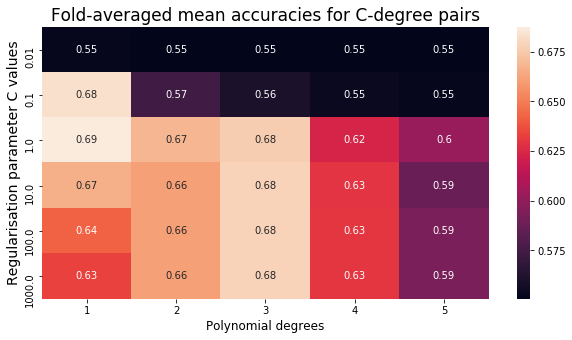

In [146]:
# (b) # Your Code goes here:
figure,axis= plt.subplots(1,1, figsize=(10,5))
axis.set_title('Fold-averaged mean accuracies for C-degree pairs',fontsize=17)
sns.heatmap(data=means_SVM,xticklabels=degrange,yticklabels=Crange_SVM,annot=True,robust=True,ax=axis)
axis.set_xlabel('Polynomial degrees',fontsize=12)
axis.set_ylabel('Regularisation parameter C values',fontsize=14)
C_optimal_SVM=Crange_SVM[np.where(means_SVM==means_SVM.max())[0]][0]
degree_optimal=degrange[np.where(means_SVM==means_SVM.max())[1]][0]
print("Optimal C-degree combination(yielded max mean cross_val accuracy):  ")
print("    C=",C_optimal_SVM)
print("    degree=",degree_optimal)
print("Optimal combination mean accuracy: ",round(means_SVM.max(),3))

<div align="right"><font color="blue" size="4">4.0</font></div>

In [150]:
# (c) # Your Code goes here:
SVC_optimal=SVC(kernel='poly',C=C_optimal_SVM,degree=degree_optimal)
SVC_optimal.fit(X_train,y_train)
accuracy_optimal_SVM=SVC_optimal.score(X_test,y_test)
print("Accuracy of optimised C-degree polynomial-kernel SVC: ",round(accuracy_optimal_SVM,3))

#######for part (d)#############################################################################################################
##### Testing with other kernel and same C_optimal to see if it's the kernel(poly) that's causing the lower than LR accuracy####
# SVC_test_other_kernel=SVC(kernel='rbf',C=C_optimal_SVM)
# SVC_test_other_kernel.fit(X_train,y_train)
# accuracy_test_kernel_SVM=SVC_test_other_kernel.score(X_test,y_test)
# print("Accuracy of tested C-degree polynomial-kernel SVC: ",round(accuracy_test_kernel_SVM,3))
############OUTPUT:############################
#Accuracy of tested C-degree rbf-kernel SVC:  0.73
################################################################################################################################

Accuracy of optimised C-degree polynomial-kernel SVC:  0.689


<div align="right"><font color="blue" size="4">2.0</font></div>

(d) ***Your answer goes here:***
The optimised SV classifier (with `C`=1.0 and `degree`=1=linear) surprisingly scores **lower** on the testing data than the optimised Logistic Regressor.
This could be for many reasons, such as:
-  Bad/coincidental optimisation for SV (just *happened* that kfold with 5 splits produced *those* optimal values for `C` and `degree`, although this rarely happens),
-  Better ***range of values*** tested for the `C` parameter when optimising the LogisticRegressor *(1E-5 to 1E5)* than SVC *(1E-2 to 1E3)*,
-  Better ***solver*** of the Logistic Regressor compared to SVC kernels,
-  Overfitting to the training data(more samples could lead to bias/can have outliers),
-  **Most importantly**, the ***kernel type*** that we used for our SV classifier.

As we can see from the commented-out code in part (c) above, and from the decision boundary plots (***Q2.6***), using the *radial basis function* with the **same** parameter (only applicable for `C` because rbf has no degree) yields ***much better accuracies/decision boundaries*** than our optimised poly-SVC(73% compared to 68.9% of the optimised poly-SVC) **and** Logistic Regressor (73% compared to 69.9% of the optimised LR).


<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.8 --- (LEVEL 11) --- [10 marks] ==========

Answer the followign theoretical questions:

&nbsp;&nbsp;**(a)** [Text] Is a Logistic Regression Classifier equivalent to an SVM with a Linear Kernel? why or why not?<br>
&nbsp;&nbsp;**(b)** [Text] In the previous question we optimised the `degree` and regularisation `C` simultaneously. By looking at the heatmap you plotted, can you explain the motivation behind this? That is, what would happen if we were to estimate the optimum along each dimension independently? Can you imagine a case where an independent search along each of the dimensions (known as coordinate-descent) would be guaranteed to yield the optimum result?<br>
&nbsp;&nbsp;**(c)** [Text] Despite having a hold-out testing set, we used cross-validation for optimising the hyper-parameters (only using the testing set for comparing models). Why is this? Also, mention an advantage and a disadvantage of using cross-validation to train hyper-parameters rather than a further train/validation split.

(a) ***Your answer goes here:***

(b) ***Your answer goes here:***

(c) ***Your answer goes here:***

# Appendix
## More information about visual words

The Visual words used in this project are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)